In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from ttictoc import Timer
import pickle

/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
def fitted_svm(params, X_train, Y_train):
    svm = SVC(**params)
    fitted_svm = svm.fit(X_train, Y_train)
    return fitted_svm

def ClassifierMetrics (X_train, Y_train, X_test, Y_test, fitted_model):
    Y_pred = fitted_model.predict(X_test)
    metrics = {'train_accuracy': fitted_model.score(X_train, Y_train),
               'test_accuracy': fitted_model.score(X_test, Y_test),
               'test_auc': roc_auc_score(Y_test, Y_pred),
               'test_ap': average_precision_score(Y_test, Y_pred)}
    return metrics

In [3]:
base = '/Users/chuamelia/Google Drive/Spring 2020/Machine Learning/fake-review-detection-project/data/processed/dev/'
def load_obj(fname,  base=base):
    # This loads the pickled object.
    with open(base + fname + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
train_path = '../../data/raw/train.csv'
val_path = '../../data/raw/dev.csv'

train = pd.read_csv(train_path)
validation = pd.read_csv(val_path)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cnt_vectorizer = CountVectorizer(stop_words='english', binary=True)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', binary=True)
cnt_vectorizer.fit(train['review'])
tfidf_vectorizer.fit(train['review'])

cnt_X_train = cnt_vectorizer.transform(train['review'])
tfidf_X_train = tfidf_vectorizer.transform(train['review'])

cnt_X_dev = cnt_vectorizer.transform(validation['review'])
tfidf_X_dev = tfidf_vectorizer.transform(validation['review'])

Y_train = train['label']
Y_dev = validation['label']

In [9]:
svm_model_params = {'kernel':[],'C':[], 'train_accuracy':[],'test_accuracy':[],'test_auc':[], 'test_ap':[]}
results_path = '../../data/processed/svm_svc_tfidf_unbalanced_results_ac4119.csv'
x = pd.read_csv(results_path)
svm_model_params = x.to_dict(orient='list')
del svm_model_params['Unnamed: 0']

In [12]:
svm_model_params

{'C': [1e-08, 1e-07],
 'kernel': ['rbf', 'rbf'],
 'test_accuracy': [0.898435324906732, 0.898435324906732],
 'test_ap': [0.10156467509326801, 0.10156467509326801],
 'test_auc': [0.5, 0.5],
 'train_accuracy': [0.8970837950524965, 0.8970837950524965]}

In [10]:
kernels = ['rbf', 'linear', 'poly']
cs = [10**exp for exp in range(-8, -2)]
# cs = [10**exp for exp in range(-8, 2)]

In [11]:
cs[2:]

[1e-06, 1e-05, 0.0001, 0.001]

In [20]:
tfidf_X_train = load_obj('ac4119_tfidf_X_train_set_1')
tfidf_X_dev = load_obj('ac4119_tfidf_X_dev_set_1')
cnt_X_train = load_obj('ac4119_cnt_X_train_set_1')
cnt_X_dev = load_obj('ac4119_cnt_X_dev_set_1')
Y_train = pd.read_csv(base+'ac4119_train_set_1_labels.csv')['label']
Y_dev = pd.read_csv(base+'ac4119_dev_set_1_labels.csv')['label']

In [6]:
t = Timer()
t.start()
params = {'kernel':'rbf','C':1e-06, 'gamma':'scale', 'random_state': 519}
fitted_model = fitted_svm(params, tfidf_X_train, Y_train)
elapsed = t.stop()
print('Elapsed time:',elapsed)
metrics = ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)
print(metrics)

Elapsed time: 472.6309884209186
{'train_accuracy': 0.5555555555555556, 'test_accuracy': 0.898435324906732, 'test_auc': 0.5, 'test_ap': 0.101564675093268}


In [10]:
t = Timer()
t.start()
params = {'kernel':'poly','C':0.0001, 'gamma':'scale', 'random_state': 519}
fitted_model = fitted_svm(params, tfidf_X_train, Y_train)
elapsed = t.stop()
print('Elapsed time:',elapsed)
t = Timer()
t.start()
metrics = ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)
elapsed = t.stop()
print('Elapsed time:',elapsed)
print(metrics)

Elapsed time: 449.356189024169
Elapsed time: 1182.7099318369292
{'train_accuracy': 0.5555555555555556, 'test_accuracy': 0.898435324906732, 'test_auc': 0.5, 'test_ap': 0.101564675093268}


In [18]:
t = Timer()
t.start()
params = {'kernel':'linear','C':0.0001, 'gamma':'scale', 'random_state': 519}
fitted_model = fitted_svm(params, tfidf_X_train, Y_train)
elapsed = t.stop()
print('Elapsed time:',elapsed)
t = Timer()
t.start()
metrics = ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)
elapsed = t.stop()
print('Elapsed time:',elapsed)
print(metrics)

Elapsed time: 496.16063185501844
Elapsed time: 1243.9269153978676
{'train_accuracy': 0.5555555555555556, 'test_accuracy': 0.898435324906732, 'test_auc': 0.5, 'test_ap': 0.101564675093268}


In [ ]:
t = Timer()
t.start()
params = {'kernel':'poly','C':0.0001, 'gamma':'scale', 'random_state': 519}
fitted_model = fitted_svm(params, cnt_X_train, Y_train)
elapsed = t.stop()
print('Elapsed time:',elapsed)
t = Timer()
t.start()
metrics = ClassifierMetrics(cnt_X_train, Y_train, cnt_X_dev, Y_dev, fitted_model)
elapsed = t.stop()
print('Elapsed time:', elapsed)
print(metrics)

In [8]:
Y_pred = fitted_model.predict(tfidf_X_dev)

In [16]:
import numpy as np

In [17]:
np.unique(Y_pred)

array([0])

In [11]:

roc_auc_score(Y_dev, Y_pred)

0.5

In [ ]:
t = Timer()
t.start()
params = {'kernel':k,'C':c, 'gamma':'scale', 'random_state': 519}
fitted_model = fitted_svm(params)
elapsed = t.stop()
print('Elapsed time:',elapsed)
t = Timer()
t.start()
metrics = ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)
elapsed = t.stop()
print('Elapsed time:',elapsed)
print(metrics)
for m_k in metrics.keys():
    svm_model_params[m_k].append(metrics[m_k])
elapsed = t.stop()
svm_pd = pd.DataFrame(svm_model_params)
results_path = '../../data/processed/svm_svc_tfidf_set_{0}_balanced_results_ac4119.csv'
svm_pd.to_csv(results_path, sep=',')
print('Elapsed time:',elapsed)

In [13]:
k = kernels[0]
print('Now trying: ' + k + ' kernels...')
for c in cs[2:]:
    t = Timer()
    t.start()
    svm_model_params['kernel'].append(k)
    svm_model_params['C'].append(c)
    params = {'kernel':k,'C':c, 'gamma':'scale', 'random_state': 519}
    fitted_model = fitted_svm(params)
    metrics = ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)
    for m_k in metrics.keys():
        svm_model_params[m_k].append(metrics[m_k])
    elapsed = t.stop()
    svm_pd = pd.DataFrame(svm_model_params)
    results_path = '../../data/processed/svm_svc_tfidf_unbalanced_results_ac4119.csv'
    svm_pd.to_csv(results_path, sep=',')
    print('Elapsed time:',elapsed)

Now trying: rbf kernels...
Elapsed time: 10903.700275285984
Elapsed time: 12777.556724173948
Elapsed time: 28842.457431042916
Elapsed time: 17607.22947485908


In [ ]:
ClassifierMetrics(tfidf_X_train, Y_train, tfidf_X_dev, Y_dev, fitted_model)

In [21]:
metrics

{'test_accuracy': 0.898435324906732,
 'test_ap': 0.101564675093268,
 'test_auc': 0.5,
 'train_accuracy': 0.8970837950524965}

In [14]:
svm_pd = pd.DataFrame(svm_model_params)
results_path = '../../data/processed/svm_svc_tfidf_unbalanced_results_ac4119.csv'
svm_pd.to_csv(results_path, sep=',')
# svm_pd = pd.read_csv(results_path, sep=',', index_col=0)

In [19]:
svm_pd

,kernel,C,train_accuracy,test_accuracy,test_auc,test_ap
0,rbf,1.000000e-08,0.897084,0.898435,0.5,0.101565
1,rbf,1.000000e-07,0.897084,0.898435,0.5,0.101565
2,rbf,1.000000e-06,0.897084,0.898435,0.5,0.101565
3,rbf,1.000000e-05,0.897084,0.898435,0.5,0.101565
4,rbf,1.000000e-04,0.897084,0.898435,0.5,0.101565
5,rbf,1.000000e-03,0.897084,0.898435,0.5,0.101565


In [17]:
purples = sns.cubehelix_palette(1, start=0.4, rot=-.1)

Text(0.5, 1.0, 'Model AUC by \nC & kernel')

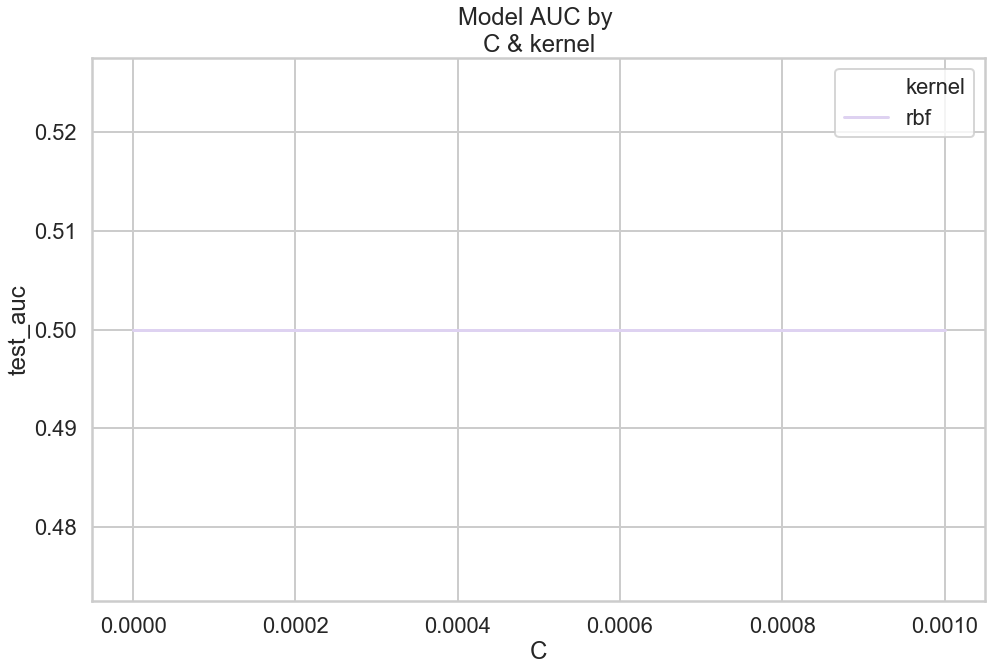

In [18]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16, 10))

sns.lineplot(x='C', y='test_auc', hue='kernel', palette = purples , data = svm_pd  )\
.set_title('Model AUC by \nC & kernel')